# Curso de Manejo de Datos Faltantes: Detección y Exploración

[![Curso creado por jvelezmagic](https://img.shields.io/badge/Desarrollado%20por-%40jvelezmagic-blue?&style=for-the-badge&logo=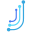)](https://jvelezmagic.com/)

![Curso de Exploración de Valores Faltantes para Data Science](logo-curso.jpeg)

## Configuración de ambiente de trabajo

```bash
pip install --upgrade pip
```

```bash
pip install pyjanitor matplotlib==3.5.1 missingno numpy pandas pyreadr seaborn session-info upsetplot==0.6.1
```

or 

```bash
pip install -r requirements.txt
```

## Importar librerías

In [ ]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

## Importar funciones personalizadas

## Configurar el aspecto general de las gráficas del proyecto

In [ ]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

## Operar con valores faltantes

### Python

### NumPy

### Pandas

## Cargar los conjuntos de datos

### Pima Indians Diabetes

### naniar (oceanbuoys, pedestrian, riskfactors)

#### Crear unidades de información de los conjuntos de datos

#### Descargar y cargar los conjuntos de datos

#### Incluir conjuntos de datos en nuestro ambiente local

### Verificar carga

## Tabulación de valores faltantes

### Resúmenes básicos de valores faltantes

#### Número total de valores completos (sin observaciones faltantes)

#### Número total de valores faltantes

### Resúmenes tabulares de valores faltantes

#### Variables / Columnas

##### Resumen por variable

###### Tabulación del resumen por variable

#### Casos / Observaciones / Filas

##### Resúmenes por caso

###### Tabulación del resumen por caso

### Intervalos de valores faltantes

### _Run length_ de valores faltantes

## Visualización inicial de valores faltantes

### Variable

### Casos / Observaciones / Filas

## Codificación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    Al igual que cada persona es una nueva puerta a un mundo diferente, los <b>valores faltantes</b> existen en diferentes formas y colores. Al trabajar con valores faltantes será crítico entender sus distintas representaciones. A pesar de que el conjunto de datos de trabajo pareciera que no contiene valores faltantes, deberás ser capaz de ir más allá de lo observado a simple vista para remover el manto tras el cual se esconde lo desconocido.
    </p>
</div>

### Valores comúnmente asociados a valores faltantes

#### Cadenas de texto

In [ ]:
common_na_strings = (
    "missing",
    "NA",
    "N A",
    "N/A",
    "#N/A",
    "NA ",
    " NA",
    "N /A",
    "N / A",
    " N / A",
    "N / A ",
    "na",
    "n a",
    "n/a",
    "na ",
    " na",
    "n /a",
    "n / a",
    " a / a",
    "n / a ",
    "NULL",
    "null",
    "",
    "?",
    "*",
    ".",
)

#### Números

In [ ]:
common_na_numbers = (-9, -99, -999, -9999, 9999, 66, 77, 88, -1)

### ¿Cómo encontrar los valores comúnmente asociados a valores faltantes?

In [ ]:
missing_data_example_df = pd.DataFrame.from_dict(
    dict(
        x = [1, 3, "NA", -99, -98, -99],
        y = ["A", "N/A", "NA", "E", "F", "G"],
        z = [-100, -99, -98, -101, -1, -1]
    )
)

missing_data_example_df

#### Revisar tipos de datos

#### Revisar valores únicos de los datos

### Sustituyendo valores comúnmente asociados a valores faltantes

#### Sustitución desde la lectura de datos

#### Sustitución global

#### Sustitución dirigida

## Conversión de valores faltantes implícitos a explícitos

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <br>
    <br>
    <p>
        <i>
        "<b>Implícito</b> se refiere a todo aquello que se entiende que está incluido
        pero sin ser expresado de forma directa o explícitamente."
        </i>
    </p>
    <p>
    Un <code>valor faltante implícito</code> indica que el valor faltante <b>debería estar incluido</b>
    en el conjunto de datos del análisis, <b>sin que éste lo diga</b> o lo <b>especifique</b>.
    Por lo general, son valores que podemos encontrar al pivotar nuestros datos
    o contabilizar el número de apariciones de combinaciones de las variables de estudio.
    </p>
</div>

In [ ]:
implicit_to_explicit_df = pd.DataFrame.from_dict(
    data={
        "name": ["lynn", "lynn", "lynn", "zelda"],
        "time": ["morning", "afternoon", "night", "morning"],
        "value": [350, 310, np.nan, 320]
    }
)

implicit_to_explicit_df

### Estrategias para la identificación de valores faltantes implícitos

#### Pivotar la tabla de datos

#### Cuantificar ocurrencias de n-tuplas

### Exponer filas faltantes implícitas a explícitas

<div class="alert alert-info">
    <b style="font-size: 1.5em;">📘 Información</b>
    <p>
       <a href="https://pyjanitor-devs.github.io/pyjanitor/api/functions/#janitor.functions.complete.complete", class="alert-link"><code>janitor.complete()</code></a> está modelada a partir de la función <a href="https://tidyr.tidyverse.org/reference/complete.html", class="alert-link"><code>complete()</code></a> del paquete <a href="https://tidyr.tidyverse.org/index.html", class="alert-link"><code>tidyr</code></a> y es un <i>wrapper</i> alrededor de <a href="https://pyjanitordevs.github.io/pyjanitor/api/functions/#janitor.functions.expand_grid.expand_grid", class="alert-link"><code>janitor.expand_grid()</code></a>, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.merge()</code></a> y <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html", class="alert-link"><code>pd.fillna()</code></a>. En cierto modo, es lo contrario de <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html", class="alert-link"><code>pd.dropna()</code></a>, ya que expone implícitamente las filas que faltan.
    </p>
    <p>
    Son posibles combinaciones de nombres de columnas o una lista/tupla de nombres de columnas, o incluso un  diccionario de nombres de columna y nuevos valores.
    </p>
    <p>
    Las columnas <a href="https://pandas.pydata.org/docs/user_guide/advanced.html"><code>MultiIndex</code></a> no son complatibles.
    </p>
</div>

#### Exponer n-tuplas de valores faltantes

Ejemplo, encontrar los pares faltantes de `name` y `time`.

#### Limitar la exposición de n-tuplas de valores faltantes

#### Rellenar los valores faltantes

#### Limitar el rellenado de valores faltantes implícitos

## Tipos de valores faltantes

### _Missing Completely At Random_ (MCAR)

### _Missing At Random_ (MAR)

### _Missing Not At Random_ (MNAR)

## Concepto y aplicación de la matriz de sombras (_i.e._, _shadow matrix_)

 ### Construcción de la matriz de sombras

### Utilizar función de utilería `bind_shadow_matrix()`

### Explorar estadísticos utilizando las nuevas columnas de la matriz de sombras

## Visualización de valores faltantes en una variable

## Visualización de valores faltantes en dos variables

## Correlación de nulidad

## Eliminación de valores faltantes

<div class="alert alert-warning", role="alert">
    <b style="font-size: 1.5em;">🚧 Advertencia</b>
    <p>
    La eliminación de valores faltantes <b>asume</b> que los valores faltantes están perdidos
    completamente al azar (<code>MCAR</code>). En cualquier otro caso, realizar una
    eliminación de valores faltantes podrá ocasionar <b>sesgos</b> en los
    análisis y modelos subsecuentes.
    </p>
</div>

Primero observa el número total de observaciones y variables que tiene tu conjunto de datos.

### _Pairwise deletion_ (eliminación por pares)

### _Listwise Deletion or Complete Case_ (Eliminación por lista o caso completo)

#### Con base en 1 columna

#### Con base en 2 o más columnas

### Representación gráfica tras la eliminación de los valores faltantes

## Imputación básica de valores faltantes

### Imputación con base en el contexto

In [ ]:
implicit_to_explicit_df = pd.DataFrame(
    data={
        "name": ["lynn", np.nan, "zelda", np.nan, "shadowsong", np.nan],
        "time": ["morning", "afternoon", "morning", "afternoon", "morning", "afternoon",],
        "value": [350, 310, 320, 350, 310, 320]
    }
)

implicit_to_explicit_df

### Imputación de un único valor

## Continúa aprendiendo sobre el manejo de valores faltantes

<div class="alert alert-success">
    <b style="font-size: 1.5em;">✅ ¡Felicidades por terminar el curso!</b>
    <p>
Has aprendido bastante sobre la exploración y manipulación de valores faltantes.
    </p>
    <p>
Empezaste conociento las principales operaciones al trabajar con valores faltantes. Ahora, eres consciente de que estas operaciones no son universales y cada software decide tratar a los valores faltantes a su conveniencia.
    </p>
    <p>
Y, hablando de conveniencias, comenzaste tu camino en la exploración de valores faltantes a través de una representación universal de qué es lo que faltaba. No obstante, no pasó mucho para darte cuenta de que los valores faltantes pueden existir en formas muy variables. Incluso, en formas en las que no sabemos que nos faltan estos valores en sí mismos. 
    </p>
    <p>
Con los valores faltantes ya expuestos, te conviertes en una persona capaz de explorarlos en profundidad de forma estadística y visual. Entendiendo así, los distintos mecanismos que pueden tener los valores faltantes: MCAR, MAR y MNAR.
    </p>
    <p>
A su vez, aprendiste las bases sobre cómo tratarlos a través de la eliminación de elementos o la imputación de valores de una forma básica y sencilla. Por lo tanto, necesitarás continuar tu camino de aprendizaje con un curso que te permita profundizar en estas técnicas de tratamiento para valores faltantes.
    </p>
    <p>
Te recomiendo continuar con mi <a href="https://platzi.com/cursos/datos-faltantes-imputacion/">Curso de Manejo de Datos Faltantes: Imputación</a>. Estoy seguro de que tus habilidades adquiridas hasta el momento mejorarán, permitiéndote realizar análisis cada vez más complejos y cercanos al mundo real.
    </p>
    <p>
    Con mucha alegría por tu logro,
   Jesús Vélez Santiago
    </p>
    
</div>

## Información de sesión

In [ ]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=00f0d7e0-2381-4186-8c56-0ffaad4cee07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>